# Regularisation

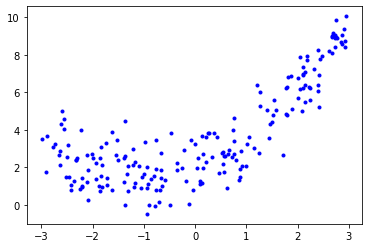

In [27]:
import numpy as np
import matplotlib.pyplot as plt

m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_test, y_train, y_test = X[:150], X[150:], y[:150], y[150:]
plt.plot(X, y, 'b.')

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)
print(X_train_2)

[[ 1.00000000e+00 -2.16392395e-01  4.68256688e-02]
 [ 1.00000000e+00 -1.63105263e+00  2.66033269e+00]
 [ 1.00000000e+00  2.22415929e+00  4.94688454e+00]
 [ 1.00000000e+00  2.15025781e+00  4.62360866e+00]
 [ 1.00000000e+00  2.10989717e+00  4.45166605e+00]
 [ 1.00000000e+00  2.39132861e+00  5.71845250e+00]
 [ 1.00000000e+00  8.78409650e-01  7.71603513e-01]
 [ 1.00000000e+00 -1.31781657e+00  1.73664050e+00]
 [ 1.00000000e+00  2.61260572e+00  6.82570863e+00]
 [ 1.00000000e+00 -2.72921657e+00  7.44862311e+00]
 [ 1.00000000e+00 -2.11879111e+00  4.48927576e+00]
 [ 1.00000000e+00 -2.98874819e+00  8.93261573e+00]
 [ 1.00000000e+00 -1.83989234e+00  3.38520382e+00]
 [ 1.00000000e+00  1.14786754e+00  1.31759990e+00]
 [ 1.00000000e+00 -2.55857638e+00  6.54631311e+00]
 [ 1.00000000e+00 -1.74751786e+00  3.05381869e+00]
 [ 1.00000000e+00 -2.41961426e+00  5.85453316e+00]
 [ 1.00000000e+00  1.42987483e-01  2.04454203e-02]
 [ 1.00000000e+00  6.61610365e-01  4.37728275e-01]
 [ 1.00000000e+00  1.21093502e+

MSE for the train set:  1.0286094011691649
MSE for the test set:  1.1262422601321327


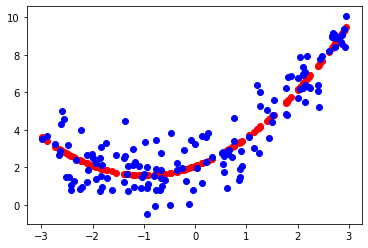

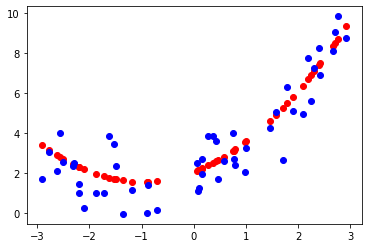

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_2, y_train)
pred_test = lr.predict(X_test_2)
pred_train = lr.predict(X_train_2)
print('MSE for the train set: ', mean_squared_error(y_train, pred_train))
print('MSE for the test set: ', mean_squared_error(y_test, pred_test))


plt.scatter(X_train, pred_train, color='r')
plt.scatter(X_train, y_train, color='b')
plt.show()


plt.scatter(X_test, pred_test, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

MSE for the train set:  0.8282139396369792
MSE for the test set:  1.2813470967035763


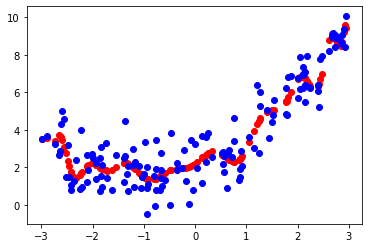

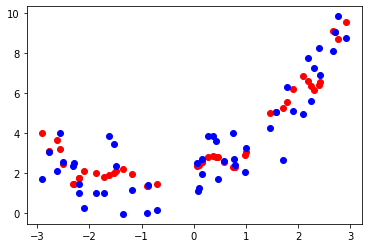

In [51]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=20)
X_train_20 = poly.fit_transform(X_train)
X_test_20 = poly.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_20, y_train)
pred_test = lr.predict(X_test_20)
pred_train = lr.predict(X_train_20)
print('MSE for the train set: ', mean_squared_error(y_train, pred_train))
print('MSE for the test set: ', mean_squared_error(y_test, pred_test))

plt.scatter(X_train, pred_train, color='r')
plt.scatter(X_train, y_train, color='b')
plt.show()


plt.scatter(X_test, pred_test, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

## Early Stopping

In [117]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(4)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


train_errors = []
test_errors = []
n_epochs = 500
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_test_predict = sgd_reg.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

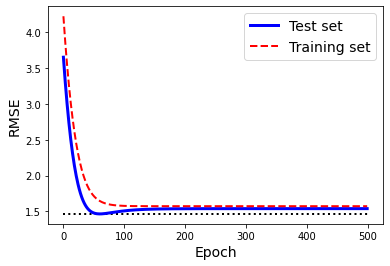

In [118]:
import numpy as np
import matplotlib.pyplot as plt

best_epoch = np.argmin(test_errors)
best_test_rmse = np.sqrt(test_errors[best_epoch])

plt.plot([0, n_epochs], [best_test_rmse, best_test_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## LASSO Regression

$$
Loss = MSE + \alpha \sum_{i=1}^{m} \|w_i\|
$$

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# Initialize the dataset
np.random.seed(3)
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_test, y_train, y_test = X[:150], X[150:], y[:150], y[150:]

# Transform the dataset to a polynomial dataset of degree 30
poly = PolynomialFeatures(degree=30)
X_train_30 = poly.fit_transform(X_train)
X_test_30 = poly.transform(X_test)

/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+02, tolerance: 7.377e-02
  model = cd_fast.enet_coordinate_descent(


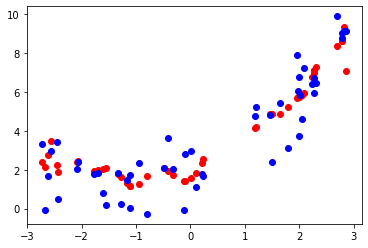

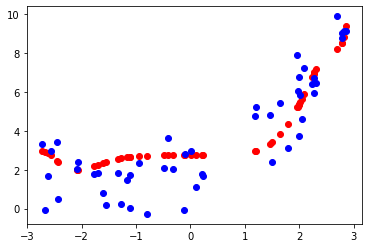

In [167]:
lr = LinearRegression()
lasso = Lasso(random_state=4)

lr.fit(X_train_30, y_train)
pred_lr = lr.predict(X_test_30)

lasso.fit(X_train_30, y_train)
pred_lasso = lasso.predict(X_test_30)


plt.scatter(X_test, pred_lr, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()


plt.scatter(X_test, pred_lasso, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

## Ridge Regression

$$
Loss = MSE + \alpha \frac{1}{2} \sum_{i=1}^{m} \|w_i\|^2
$$

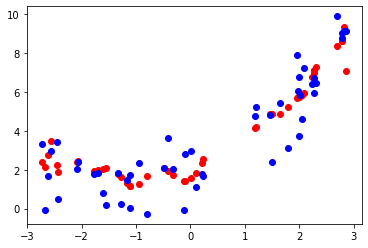

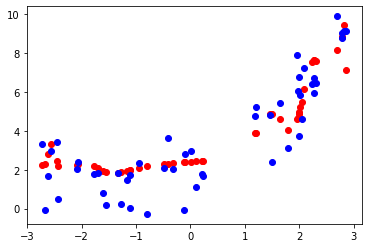

In [165]:
from sklearn.linear_model import Ridge
lr = LinearRegression()
ridge = Ridge(random_state=4, alpha=100)

lr.fit(X_train_30, y_train)
pred_lr = lr.predict(X_test_30)

ridge.fit(X_train_30, y_train)
pred_ridge = ridge.predict(X_test_30)


plt.scatter(X_test, pred_lr, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()


plt.scatter(X_test, pred_ridge, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()

## Elastic Net

$$
Loss = MSE + \frac{1-r}{2}\alpha \sum_{i=1}^{m} \|w_i\|^2 + r\alpha \sum_{i=1}^{m} \|w_i\|
$$

/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+02, tolerance: 7.377e-02
  model = cd_fast.enet_coordinate_descent(


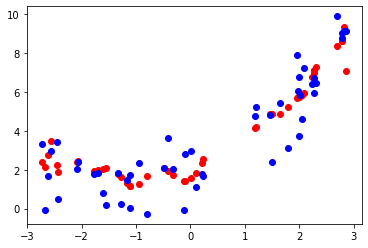

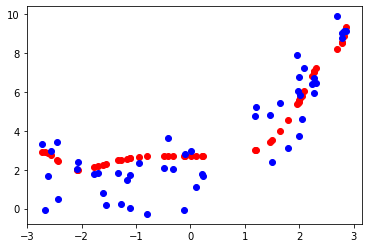

In [171]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet(l1_ratio=0.5, random_state=4)
el_net.fit(X_train_30, y_train)
pred_el_net = el_net.predict(X_test_30)


plt.scatter(X_test, pred_lr, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()


plt.scatter(X_test, pred_el_net, color='r')
plt.scatter(X_test, y_test, color='b')
plt.show()